In [1]:
%matplotlib inline

In [2]:
import numpy as np # matrix manipulations
from matplotlib import pyplot as plt           
import pylab                                   
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

In [65]:
from scipy.signal import butter, lfilter, freqs
from scipy.signal import cheb2ord, cheby2, freqz, bode, tf2ss, TransferFunction
from math import log10, pi
from numpy import angle

Filter Order: 2


[0.50922793 1.00156134 0.50922793]
----------------------------------------
[1.         0.74288292 0.27713427]




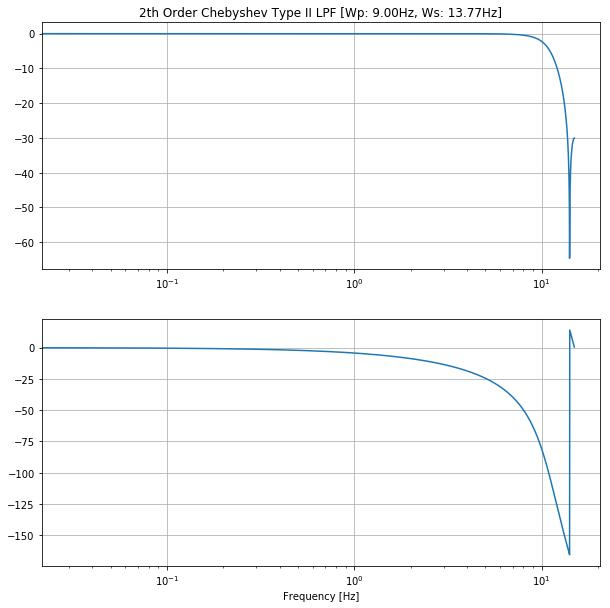

In [137]:
Fs = 30  # samples/sec

# normalized pass (Wp) and stop (Ws) band freqs
Wp = .6
Ws = .95

Rp = 1  # pass band loss (dB)
Rs = 30 # attenuation in stop band (dB)

# get the order and natural freq
n,Ws = cheb2ord(Wp,Ws,Rp,Rs)

print("Filter Order:", n)

# get the tf, b: numerator, a: denominator
b,a = cheby2(n,Rs,Ws, btype='lowpass', analog=False)

print('\n')
print(b)
print('-'*40)
print(a)
print('\n')

# get response of analog filter
w,r = freqz(b,a)

"""
     cycle    sample      rad
Hz = ----- * -------- * --------
      2pi      sec       sample
"""
# convert data
db = [20*log10(abs(x)) for x in r]
phase = [angle(x)*180/pi for x in r]
# https://stackoverflow.com/questions/29620694/matlab-freqz-function-in-python
hz = [Fs*x/(2*pi) for x in w]

# plot
plt.subplot(2,1,1)
plt.semilogx(hz,db)
plt.grid(True)
plt.title('{}th Order Chebyshev Type II LPF [Wp: {:.2f}Hz, Ws: {:.2f}Hz]'.format(
    n, Wp*Fs/2, Ws*Fs/2))

plt.subplot(2,1,2)
plt.semilogx(hz, phase)
plt.grid(True)
plt.xlabel('Frequency [Hz]');



[0.50922793 1.00156134 0.50922793]
----------------------------------------
[1.         0.74288292 0.27713427]




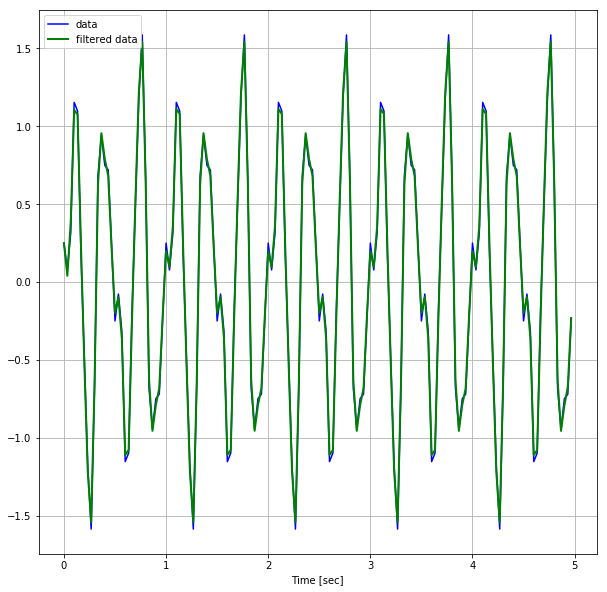

In [142]:
from scipy.signal import filtfilt

print('\n')
print(b)
print('-'*40)
print(a)
print('\n')

# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * Fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.

data = np.sin(3*2*pi*t) + .25*np.cos(9*2*pi*t) + 0.5*np.sin(15.0*2*pi*t) + 0.5*np.sin(25.0*2*pi*t)

# Filter the data, and plot both the original and filtered signals.
# y = lfilter(b, a, data)
y = filtfilt(b, a, data)

plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)

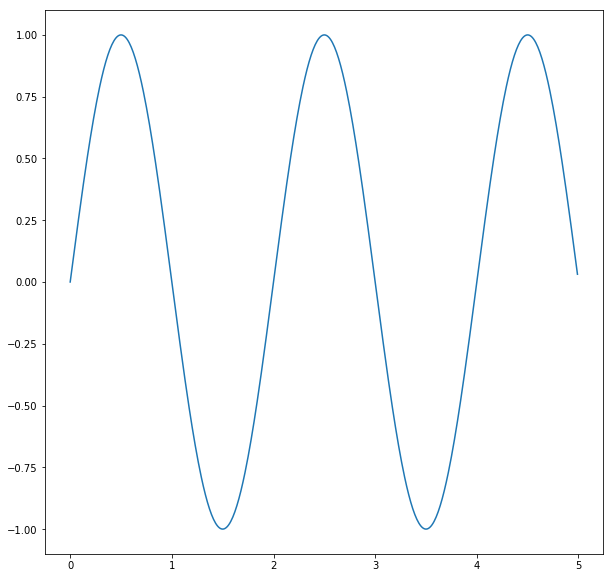

In [128]:
t = np.linspace(0, 5, 500, endpoint=False)
plt.plot(t, np.sin(.5*2*pi*t))

In [106]:
# s = TransferFunction(b,a)
# print(s)
# w, mag, phase = bode(s)
# plt.figure()
# plt.semilogx(w, mag)    # Bode magnitude plot
# plt.grid(True)
# plt.title('Magnitude')
# plt.figure()
# plt.semilogx(w, phase)  # Bode phase plot
# plt.grid(True)
# plt.title('Phase')

In [53]:
from scipy.signal import freqs, iirfilter



[0.04171482 0.08658591 0.0928275  0.08658591 0.04171482]
----------------------------------------
[1.         2.99965949 3.88956927 2.47651439 0.68417129]




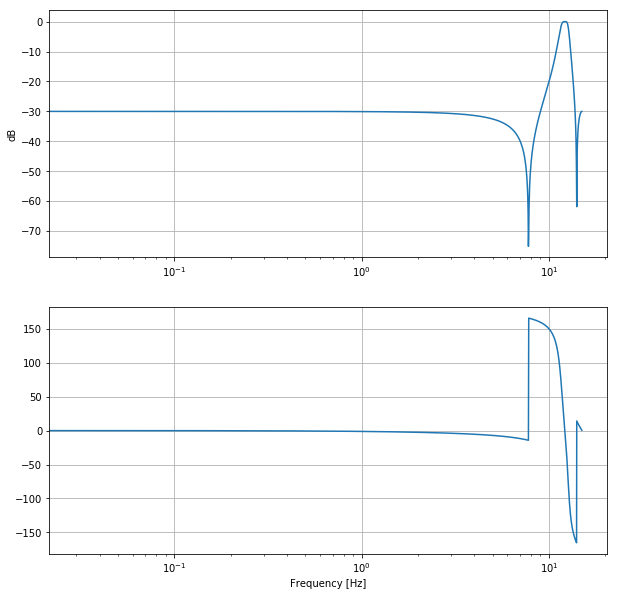

In [134]:
filter_order = 2
b, a = iirfilter(filter_order, [Wp, Ws], Rp, Rs, analog=False, ftype='cheby2')

print('\n')
print(b)
print('-'*40)
print(a)
print('\n')

w, h = freqz(b, a)

# convert data
db = [20*log10(abs(x)) for x in h]
phase = [angle(x)*180/pi for x in h]
hz = [Fs*x/(2*pi) for x in w]

# plot
plt.subplot(2,1,1)
plt.semilogx(hz,db)
plt.grid(True)
plt.ylabel('dB')

plt.subplot(2,1,2)
plt.semilogx(hz, phase)
plt.grid(True)
plt.xlabel('Frequency [Hz]');

# Example

https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

A few comments:

- The Nyquist frequency is half the sampling rate.
- You are working with regularly sampled data, so you want a digital filter, not an analog filter. This means you should not use analog=True in the call to butter, and you should use scipy.signal.freqz (not freqs) to generate the frequency response.
- One goal of those short utility functions is to allow you to leave all your frequencies expressed in Hz. You shouldn't have to convert to rad/sec. As long as you express your frequencies with consistent units, the scaling in the utility functions takes care of the normalization for you.

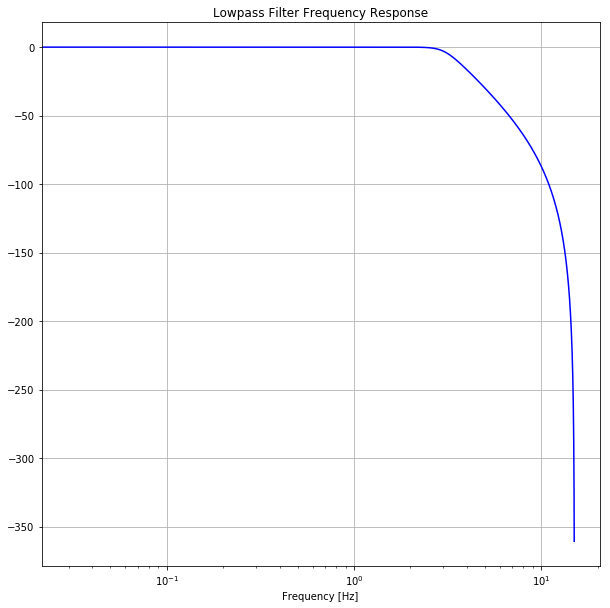

In [88]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.0  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a)

db = [20*log10(abs(x)) for x in h]

# plt.subplot(2, 1, 1)
# plt.plot(0.5*fs*w/np.pi, abs(h), 'b')
plt.semilogx(0.5*fs*w/np.pi, db, 'b')
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

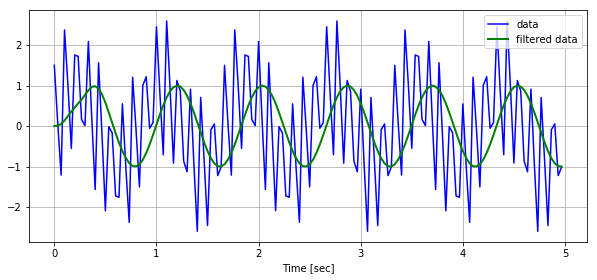

In [68]:
# Demonstrate the use of the filter.
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)